In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [35]:
df = pd.read_csv('measurements.csv')

In [36]:
df.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  13 non-null     object
 11  refill gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


In [40]:
df.describe()

,speed,temp_outside,AC,rain,sun
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,41.927835,11.358247,0.077320,0.123711,0.082474
std,13.598524,6.991542,0.267443,0.329677,0.275441
min,14.000000,-5.000000,0.000000,0.000000,0.000000
25%,32.750000,7.000000,0.000000,0.000000,0.000000
50%,40.500000,10.000000,0.000000,0.000000,0.000000
75%,50.000000,16.000000,0.000000,0.000000,0.000000
max,90.000000,31.000000,1.000000,1.000000,1.000000


In [48]:
df.dtypes

distance         float64
consume          float64
speed              int64
temp_inside      float64
temp_outside       int64
specials          object
gas_type          object
AC                 int64
rain               int64
sun                int64
refill liters     object
refill gas        object
dtype: object

In [49]:
df.isna().sum()

distance           0
consume            0
speed              0
temp_inside        0
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64

In [43]:
df.distance = df.distance.apply(lambda x: re.sub(',','.', x))
df.distance = pd.to_numeric(df.distance)

In [45]:
df.consume = df.consume.apply(lambda x: re.sub(',','.', x))
df.consume = pd.to_numeric(df.consume)

In [46]:
df.temp_inside = df.temp_inside.astype('str').apply(lambda x: x.replace(',','.'))
df.temp_inside = pd.to_numeric(df.temp_inside, errors='coerce')

In [47]:
df.temp_inside = df.temp_inside.fillna(df.temp_inside.median())

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       388 non-null    float64
 1   consume        388 non-null    float64
 2   speed          388 non-null    int64  
 3   temp_inside    388 non-null    float64
 4   temp_outside   388 non-null    int64  
 5   specials       93 non-null     object 
 6   gas_type       388 non-null    object 
 7   AC             388 non-null    int64  
 8   rain           388 non-null    int64  
 9   sun            388 non-null    int64  
 10  refill liters  13 non-null     object 
 11  refill gas     13 non-null     object 
dtypes: float64(3), int64(5), object(4)
memory usage: 36.5+ KB


In [53]:
df.rename(columns={'refill liters':'refill_liters', 'refill gas':'refill_gas'},inplace=True)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       388 non-null    float64
 1   consume        388 non-null    float64
 2   speed          388 non-null    int64  
 3   temp_inside    388 non-null    float64
 4   temp_outside   388 non-null    int64  
 5   specials       93 non-null     object 
 6   gas_type       388 non-null    object 
 7   AC             388 non-null    int64  
 8   rain           388 non-null    int64  
 9   sun            388 non-null    int64  
 10  refill_liters  13 non-null     object 
 11  refill_gas     13 non-null     object 
dtypes: float64(3), int64(5), object(4)
memory usage: 36.5+ KB


In [55]:
df.refill_liters = pd.to_numeric(df.refill_liters, errors='coerce')

In [56]:
df.specials.unique()

array([nan, 'AC rain', 'AC', 'rain', 'snow', 'AC snow',
       'half rain half sun', 'sun', 'AC sun', 'sun ac', 'ac', 'AC Sun',
       'ac rain'], dtype=object)

In [57]:
df['snow'] = [1 if re.match('snow',x) else 0 for x in df.specials.astype('str')]

In [60]:
df.drop(['specials', 'refill_liters', 'refill_gas'], axis=1, inplace=True)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   distance      388 non-null    float64
 1   consume       388 non-null    float64
 2   speed         388 non-null    int64  
 3   temp_inside   388 non-null    float64
 4   temp_outside  388 non-null    int64  
 5   gas_type      388 non-null    object 
 6   AC            388 non-null    int64  
 7   rain          388 non-null    int64  
 8   sun           388 non-null    int64  
 9   snow          388 non-null    int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 30.4+ KB


/home/pedro/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


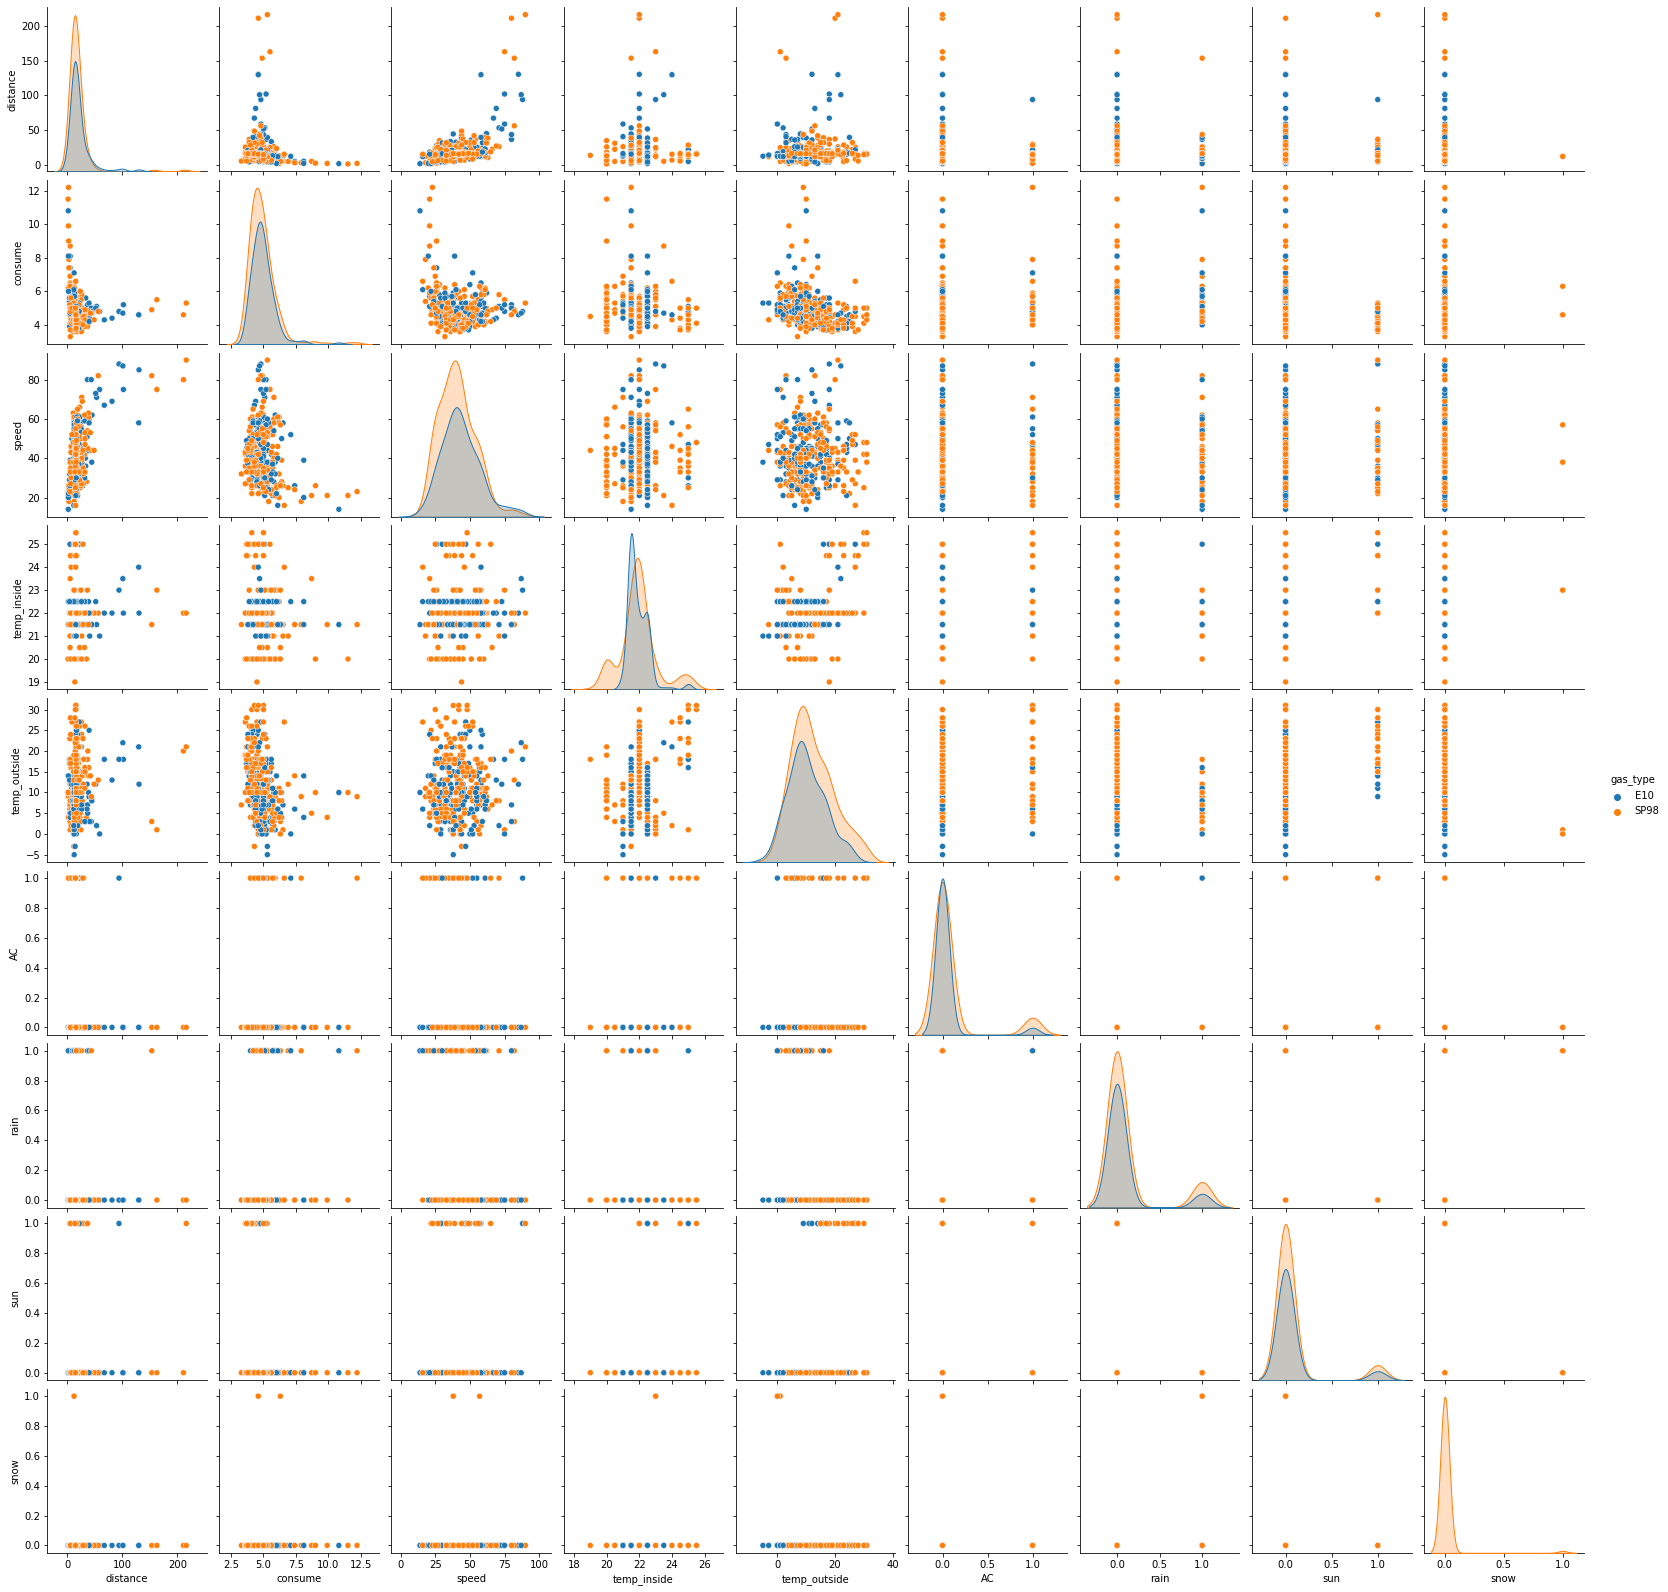

In [64]:
sns.pairplot(data=df, hue='gas_type')

In [65]:
dummy = pd.get_dummies(df, drop_first=True)

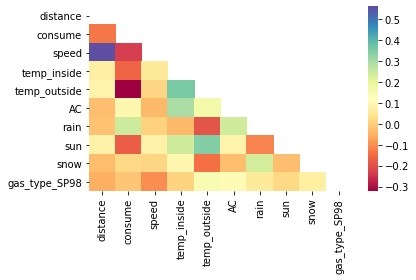

In [66]:
heatmap = sns.heatmap(dummy.corr(),mask= np.triu(np.ones_like(dummy.corr())), cmap="Spectral")
fig = heatmap.get_figure()
plt.tight_layout()

In [67]:
e10 = df[df['gas_type']=='E10']
sp98 = df[df['gas_type']=='SP98']

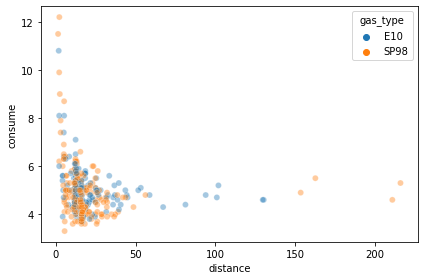

In [68]:
one = sns.scatterplot(data=df, x='distance', y='consume', hue='gas_type', alpha=0.4)
fig = one.get_figure()
plt.tight_layout()

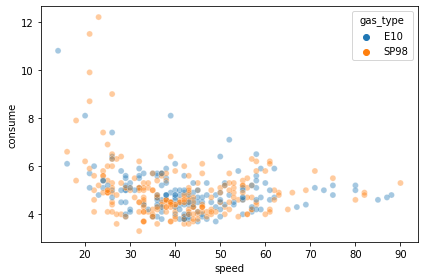

In [69]:
two = sns.scatterplot(data=df, x='speed', y='consume', hue='gas_type', alpha=0.4)
fig = two.get_figure()
plt.tight_layout()

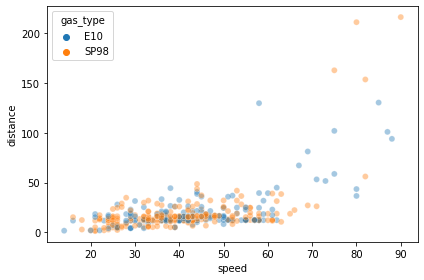

In [70]:
three = sns.scatterplot(data=df, x='speed', y='distance', hue='gas_type', alpha=0.4)
fig = three.get_figure()
plt.tight_layout()

In [71]:
df['time'] = df.distance/df.speed

<AxesSubplot:xlabel='time', ylabel='consume'>

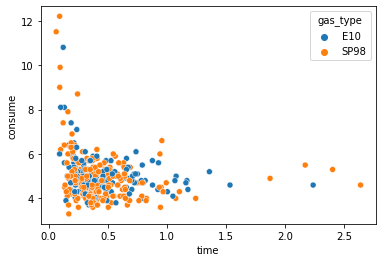

In [72]:
sns.scatterplot(data=df, x='time', y='consume', hue='gas_type')

In [73]:
df.groupby('gas_type').agg({'consume':'mean'})

,consume
gas_type,
E10,4.931250
SP98,4.899123


In [74]:
df.groupby('AC').agg({'consume':'mean'})

,consume
AC,
0,4.883520
1,5.256667


In [75]:
df.groupby('rain').agg({'consume':'mean'})

,consume
rain,
0,4.816176
1,5.593750


In [76]:
df.groupby('sun').agg({'consume':'mean'})

,consume
sun,
0,4.965169
1,4.325000


In [77]:
df.groupby('snow').agg({'consume':'mean'}).reset_index()

,snow,consume
0,0,4.910390
1,1,5.166667


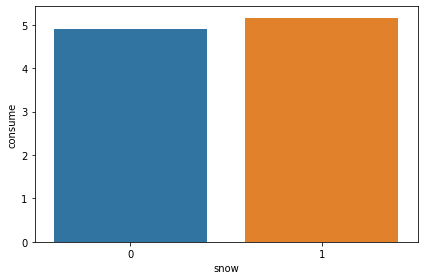

In [78]:
four = sns.barplot(data=df.groupby('snow').agg({'consume':'mean'}).reset_index(), x='snow', y='consume')
fig = four.get_figure()
plt.tight_layout()

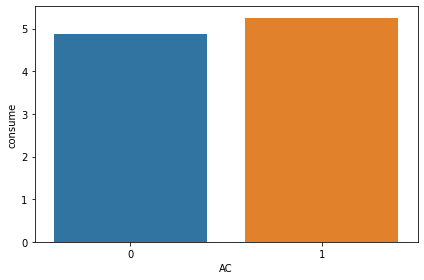

In [79]:
five = sns.barplot(data=df.groupby('AC').agg({'consume':'mean'}).reset_index(), x='AC', y='consume')
fig = five.get_figure()
plt.tight_layout()

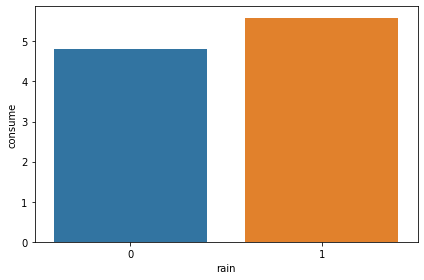

In [80]:
six = sns.barplot(data=df.groupby('rain').agg({'consume':'mean'}).reset_index(), x='rain', y='consume')
fig = six.get_figure()
plt.tight_layout()

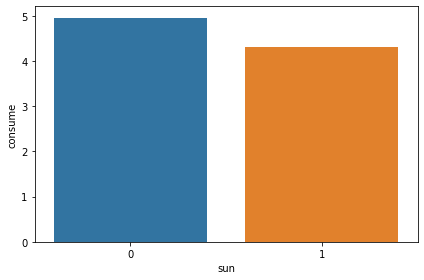

In [81]:
seven = sns.barplot(data=df.groupby('sun').agg({'consume':'mean'}).reset_index(), x='sun', y='consume')
fig = seven.get_figure()
plt.tight_layout()

El objetivo de esta parte del reto es recibir un dataset que contiene información sobre los venículos y sus consumos con el objetivo de determinar cuál es el combustible más rentable.
La conclusión a la qu ehe llegado se inclina por el SP98.
El E10 es más barato, pero se consume más rápido, por lo que a la larga se realizará un gasto mayor.

Entrando más en detalle, se puede observar que la mayoría de los viajes no han pasado de los 60km/h, por lo que es asumible que se han realizado en entorno urbano.

También hay que tner en cuenta el impacto que tienen los sistemas de confort o las condiciones climáticas sobre el vehiculo.
Por ejemplo, cuando el aire acondicionado está puesto, el consumo aumenta. Igual que si está lloviendo o nevando.
Por el contrario, al tener un clima soleado, el motor no necesita "calentar" mucho (en este proceso se consume mucho), por lo que el consumo disminuye.